# Youtube Trending Video Analysis - Project Code

### Group 10
- Harini Kamarthy
- Vaishnavi Gunna
- Swapna Sonti
- Likhitha Bodepudi
- Kusuma Kumari Dama

## Import required libraries

In [1]:
# import all the required librarires 
import pandas as pds
import numpy as nmp
import matplotlib.pyplot as mplt
import seaborn as sb


## Load the data into a dataframe & display it's info

In [2]:
# Read the data stored in "US videos.csv" file and save it in a dataframe
youtubeVideos = pds.read_csv("USvideos.csv")

# Print it's information like columns and their datatypes
youtubeVideos.info()

# Print it's first 5 lines of data 
youtubeVideos.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


## Data PreProcessing

In [3]:
# As our category dataset file is in json format, load it into a dataframe & then extract it's category names
us_categories_data=pds.read_json('US_category_id.json')
us_categories_data


,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
5,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
6,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
7,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
8,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
9,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [4]:
# creating an empty list to store the categories
categories_list = []

for n, item in enumerate(us_categories_data['items']):           
    # extract the category name
    category = item['snippet']['title']
    # append category name and its id (n) to the list
    categories_list.append({'category_id': n, 'category_name': category})

# create and store this list of categories into another dataframe
youtubeVideos_categories = pds.DataFrame(categories_list)

# display categories DataFrame
youtubeVideos_categories


,category_id,category_name
0,0,Film & Animation
1,1,Autos & Vehicles
2,2,Music
3,3,Pets & Animals
4,4,Sports
5,5,Short Movies
6,6,Travel & Events
7,7,Gaming
8,8,Videoblogging
9,9,People & Blogs


In [5]:
# Merge these categories data into the original youtube dataframe

youtubeVideos = pds.merge(youtubeVideos,youtubeVideos_categories,how="left",on="category_id")
youtubeVideos.head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,Documentary
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Family
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Drama
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Family
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Family


## Data Cleaning

In [6]:
# Copy the Original dataframe into another one, before data cleaning, and work on new one, so that original data is secured and preserved
# Also to maintain the integrity and consistency of data which is original, during this data cleaning

youtubeVideos_dataclean = youtubeVideos.copy()


Data cleaning process id done to remove the duplicates, handle the missing data values, handle the outliers, to correct the data format, normalize the data, handle the inconsistent data, and to check the data integrity

In [7]:
# Check for any Null Values in the data set
youtubeVideos_dataclean.isna().sum()


video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
category_name              57
dtype: int64

In [8]:
# Drop the null values

youtubeVideos_dataclean.dropna(subset=['category_name'],inplace=True)


In [9]:
# Drop the columns which are not needed/required

youtubeVideos_dataclean = youtubeVideos_dataclean.drop(['tags','thumbnail_link','comments_disabled','ratings_disabled', 
                                    'video_error_or_removed', 'description'], axis = 1)
youtubeVideos_dataclean.columns


Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'views', 'likes', 'dislikes', 'comment_count',
       'category_name'],
      dtype='object')

In [10]:
# let's split publish_time seperately into 2 columns for date and time

youtubeVideos_dataclean[['publish_date','publish_time']] = youtubeVideos_dataclean['publish_time'].str.split('T', expand=True)
youtubeVideos_dataclean['publish_time'] = youtubeVideos_dataclean['publish_time'].str.replace('Z','')
youtubeVideos_dataclean.columns


Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'views', 'likes', 'dislikes', 'comment_count',
       'category_name', 'publish_date'],
      dtype='object')

In [11]:
# Change trending_date & publish_date columns into datetime format
youtubeVideos_dataclean['trending_date'] = pds.to_datetime(youtubeVideos_dataclean['trending_date'], format='%y.%d.%m')
youtubeVideos_dataclean['publish_date'] = pds.to_datetime(youtubeVideos_dataclean['publish_date'], format='%Y-%M-%d')

# Create a column 'days_to_trend_videos' by using difference between published and trending dates
youtubeVideos_dataclean['days_to_trend_videos'] = (youtubeVideos_dataclean.trending_date - youtubeVideos_dataclean.publish_date).dt.days

youtubeVideos_dataclean.head()


,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,category_name,publish_date,days_to_trend_videos
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,17:13:01.000,748374,57527,2966,15954,Documentary,2017-01-13 00:11:00,304
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,07:30:00.000,2418783,97185,6146,12703,Family,2017-01-13 00:11:00,304
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,19:05:24.000,3191434,146033,5339,8181,Drama,2017-01-12 00:11:00,305
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,11:00:04.000,343168,10172,666,2146,Family,2017-01-13 00:11:00,304
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,18:01:41.000,2095731,132235,1989,17518,Family,2017-01-12 00:11:00,305


## Feature Selection

### Correlation Matrix

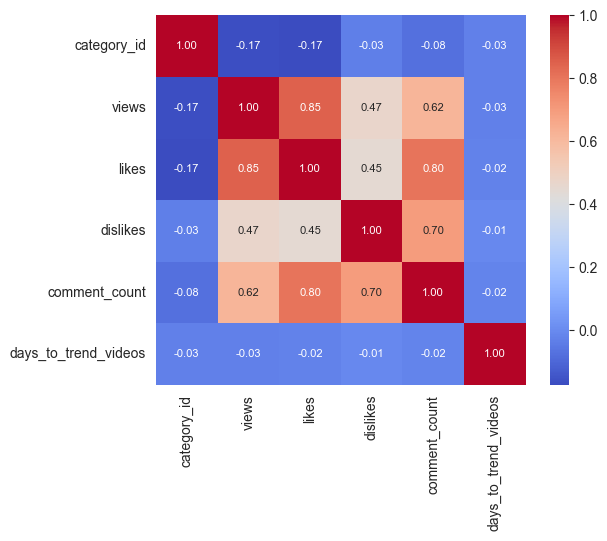

In [12]:
# Set the style of the plot
sb.set_style('dark')

# Create the heatmap
sb.heatmap(youtubeVideos_dataclean.corr(numeric_only=True), 
            cmap='coolwarm',
            cbar=True, annot=True,
            square=True, fmt='.2f', annot_kws={'size':8})

# Show the plot
mplt.show()


Here, by this Correlation matrix of features, we see that there is good positive relation between 'views', 'likes', dislikes', 'comment_count' features.

### Pair Plot

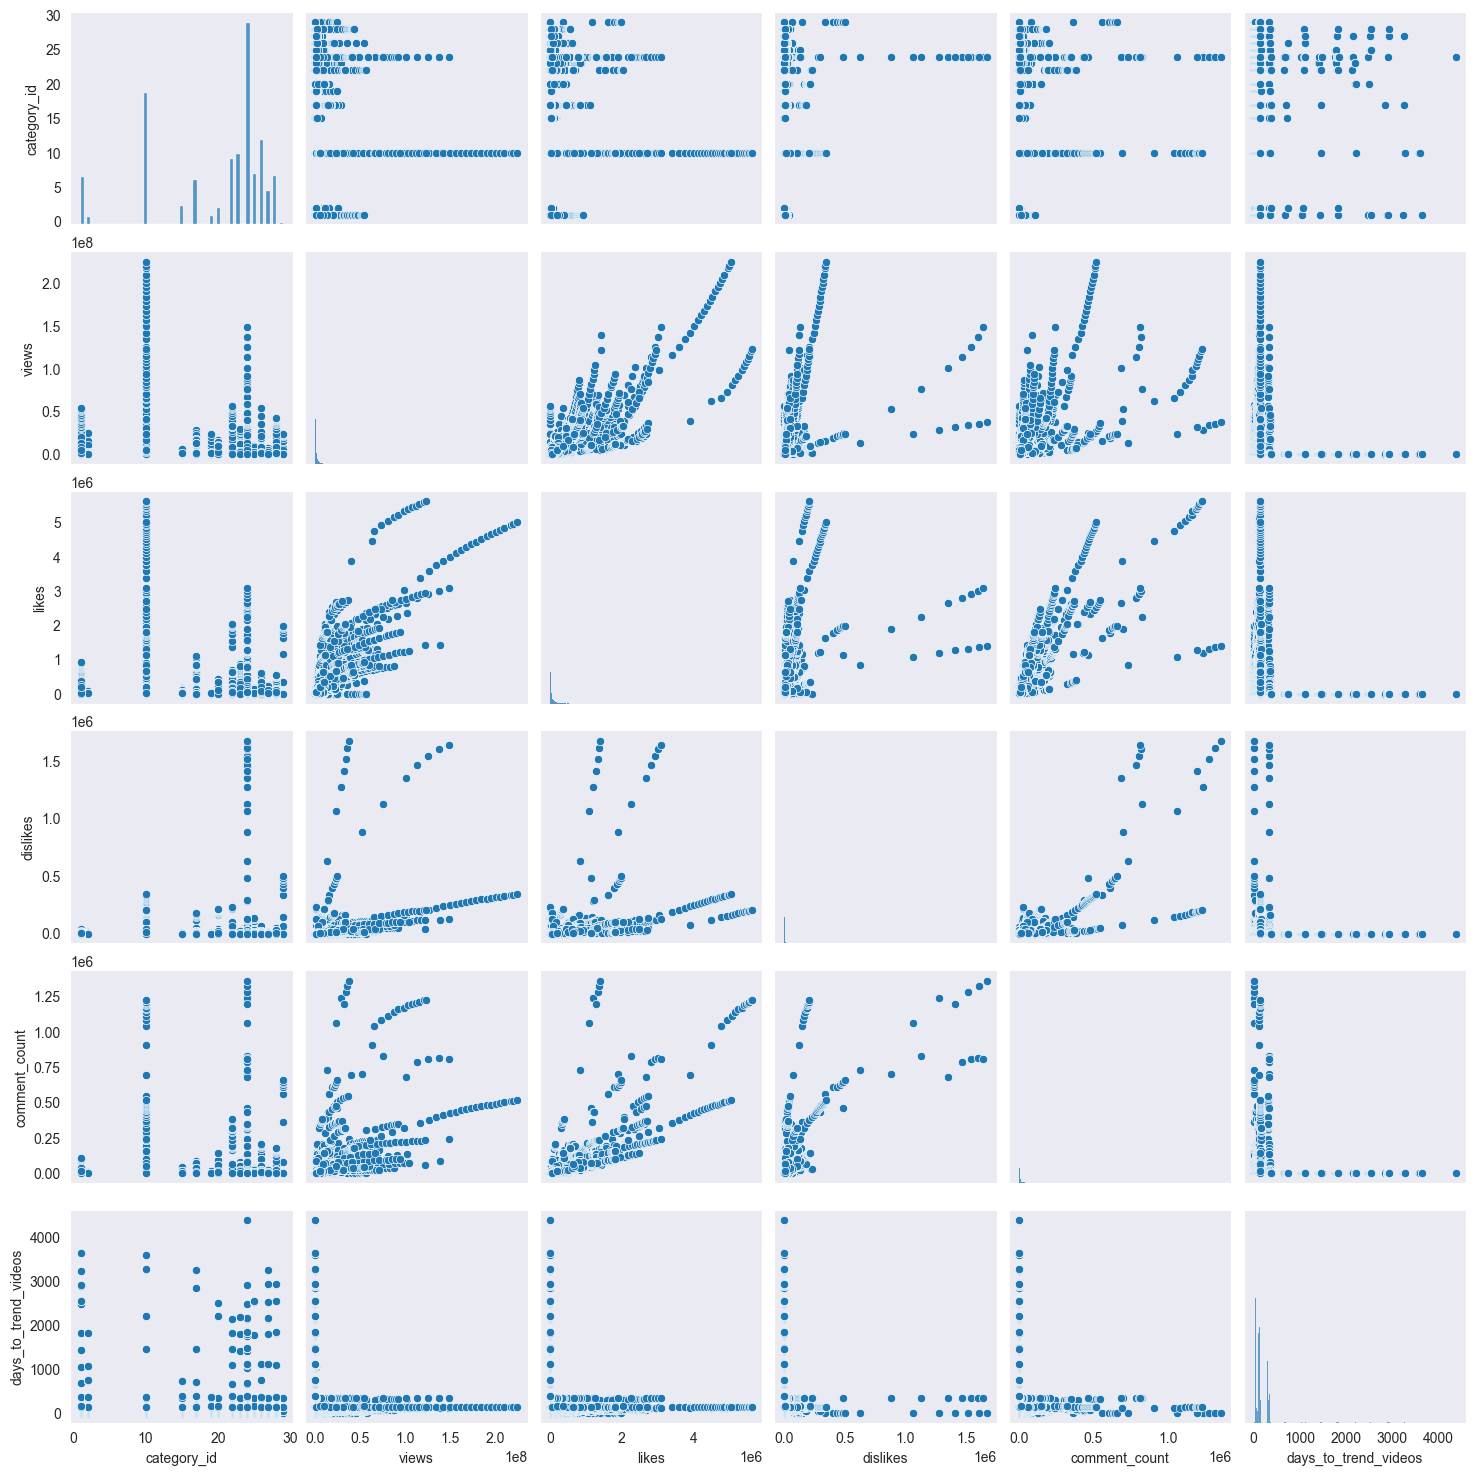

In [13]:
# Plotting the pair plot to visualize the correlations between these features
sb.pairplot(youtubeVideos_dataclean)
mplt.show()


By using Pair Plot too, we can see that  'views', 'likes', dislikes', 'comment_count' are positively correlated

In [14]:
# Select the most correlated features
mostCorrelated = youtubeVideos_dataclean.corr(numeric_only = True).abs().nlargest(4, 'views').index
mostCorrelated


Index(['views', 'likes', 'comment_count', 'dislikes'], dtype='object')

## Model Selection and Development

Developing and Training the different Predictive Models to get the predicted values of the test data
Models we are going to use in our project are :
- Linear Regression
- Ridge Regression
- Lasso Regression
- Decision Tree Regression
- Random Forest Regression
- Gradient Boosting Regression
- Multi-Layer Perceptron Regression

### Import all predictive models related libraries

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor


'views' is our target variable here -- to predict the views of a video based on correlated features 'likes', 'dislikes', 'comment_count'. Here we are considering test_size as 0.3 i.e., spliting our dataset into 70-30, 70% data for training the model and 30% data for testing purpose to predict the values

In [16]:
X = youtubeVideos_dataclean[['likes','dislikes','comment_count']]
y = youtubeVideos_dataclean['views']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)


### Linear Regression

In [17]:
linearreg = LinearRegression()
linearreg.fit(X_train, y_train)
linear_pred = linearreg.predict(X_test)
linear_pred


array([ 594687.39788626, 3459941.35365269,  588483.25547844, ...,
       4220967.62005276,  552319.69282269, 1023816.49347213])

### Ridge Regression

In [18]:
ridgereg = Ridge()
ridgereg.fit(X_train, y_train)
ridge_pred = ridgereg.predict(X_test)
ridge_pred


array([ 594687.39788628, 3459941.35365256,  588483.25547843, ...,
       4220967.62005282,  552319.6928228 , 1023816.49347213])

### Lasso Regression

In [19]:
lassoreg = Lasso()
lassoreg.fit(X_train, y_train)
lasso_pred = lassoreg.predict(X_test)
lasso_pred


array([ 594687.39789047, 3459941.35361212,  588483.25547329, ...,
       4220967.62007196,  552319.69285376, 1023816.49347229])

### Decision Tree Regression

In [20]:
dtreereg = DecisionTreeRegressor(random_state=1)
dtreereg.fit(X_train, y_train)
dtree_pred = dtreereg.predict(X_test)
dtree_pred


array([ 485345., 3047432.,  693314., ..., 2310168., 2779037.,  671078.])

### Random Forest Regression

In [21]:
randomforestreg = DecisionTreeRegressor(random_state=1)
randomforestreg.fit(X_train, y_train)
randomforest_pred = randomforestreg.predict(X_test)
randomforest_pred


array([ 485345., 3047432.,  693314., ..., 2310168., 2779037.,  671078.])

### Gradient Boosting Regression

In [22]:
gradboostreg = GradientBoostingRegressor(max_depth=10)
gradboostreg.fit(X_train, y_train)
gradboost_pred = gradboostreg.predict(X_test)
gradboost_pred


array([ 617416.78896562, 2862662.58153634,  473068.41084434, ...,
       2351256.3178152 , 1853729.12874049,  751669.68803941])

### Multi-Layer Perceptron Regression

In [23]:
mlpreg = MLPRegressor(max_iter=500)
mlpreg.fit(X_train, y_train)
mlp_pred = mlpreg.predict(X_test)
mlp_pred


array([ 395247.9048386 , 4538085.58563274,  124251.47235171, ...,
       2139062.32950406,  800375.72162351,  674133.86940398])

## Model Evaluation

For regression models, common evaluation metrics include Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), R-squared, and coefficient of determination. These metrics are used to evaluate how well a regression model is able to predict continuous numerical values.

In [24]:
# import metrics related libraries
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


### Linear Regression - Evaluation Metrics

In [25]:
linear_mse = mean_squared_error(y_test, linear_pred)
linear_rmse = mean_squared_error(y_test, linear_pred, squared=False)
linear_mae = mean_absolute_error(y_test, linear_pred)
linear_r2 = r2_score(y_test, linear_pred)

print("Mean Squared Error: {:.2f}".format(linear_mse))
print("Root Mean Squared Error: {:.2f}".format(linear_rmse))
print("Mean Absolute Error: {:.2f}".format(linear_mae))
print("R-squared: {:.2f}".format(linear_r2))


Mean Squared Error: 11623439128962.46
Root Mean Squared Error: 3409316.52
Mean Absolute Error: 1189324.09
R-squared: 0.78


### Ridge Resgression - Evaluation Metrics

In [26]:
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_rmse = mean_squared_error(y_test, ridge_pred, squared=False)
ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

print("Mean Squared Error: {:.2f}".format(ridge_mse))
print("Root Mean Squared Error: {:.2f}".format(ridge_rmse))
print("Mean Absolute Error: {:.2f}".format(ridge_mae))
print("R-squared: {:.2f}".format(ridge_r2))


Mean Squared Error: 11623439128962.33
Root Mean Squared Error: 3409316.52
Mean Absolute Error: 1189324.09
R-squared: 0.78


### Lasso Regression - Evaluation Metrics

In [27]:
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_rmse = mean_squared_error(y_test, lasso_pred, squared=False)
lasso_mae = mean_absolute_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

print("Mean Squared Error: {:.2f}".format(lasso_mse))
print("Root Mean Squared Error: {:.2f}".format(lasso_rmse))
print("Mean Absolute Error: {:.2f}".format(lasso_mae))
print("R-squared: {:.2f}".format(lasso_r2))


Mean Squared Error: 11623439128923.67
Root Mean Squared Error: 3409316.52
Mean Absolute Error: 1189324.09
R-squared: 0.78


### Decision Tree Regression - Evaluation Metrics

In [28]:
dtree_mse = mean_squared_error(y_test, dtree_pred)
dtree_rmse = mean_squared_error(y_test, dtree_pred, squared=False)
dtree_mae = mean_absolute_error(y_test, dtree_pred)
dtree_r2 = r2_score(y_test, dtree_pred)

print("Mean Squared Error: {:.2f}".format(dtree_mse))
print("Root Mean Squared Error: {:.2f}".format(dtree_rmse))
print("Mean Absolute Error: {:.2f}".format(dtree_mae))
print("R-squared: {:.2f}".format(dtree_r2))


Mean Squared Error: 5252692538839.46
Root Mean Squared Error: 2291875.33
Mean Absolute Error: 658329.79
R-squared: 0.90


### Random Forest Regression - Evaluation Metrics

In [29]:
randomforest_mse = mean_squared_error(y_test, randomforest_pred)
randomforest_rmse = mean_squared_error(y_test, randomforest_pred, squared=False)
randomforest_mae = mean_absolute_error(y_test, randomforest_pred)
randomforest_r2 = r2_score(y_test, randomforest_pred)

print("Mean Squared Error: {:.2f}".format(randomforest_mse))
print("Root Mean Squared Error: {:.2f}".format(randomforest_rmse))
print("Mean Absolute Error: {:.2f}".format(randomforest_mae))
print("R-squared: {:.2f}".format(randomforest_r2))


Mean Squared Error: 5252692538839.46
Root Mean Squared Error: 2291875.33
Mean Absolute Error: 658329.79
R-squared: 0.90


### Gradient Boosting Regression - Evaluation Metrics

In [30]:
gradboost_mse = mean_squared_error(y_test, gradboost_pred)
gradboost_rmse = mean_squared_error(y_test, gradboost_pred, squared=False)
gradboost_mae = mean_absolute_error(y_test, gradboost_pred)
gradboost_r2 = r2_score(y_test, gradboost_pred)

print("Mean Squared Error: {:.2f}".format(gradboost_mse))
print("Root Mean Squared Error: {:.2f}".format(gradboost_rmse))
print("Mean Absolute Error: {:.2f}".format(gradboost_mae))
print("R-squared: {:.2f}".format(gradboost_r2))


Mean Squared Error: 4235507993708.20
Root Mean Squared Error: 2058034.98
Mean Absolute Error: 651234.03
R-squared: 0.92


### Multi-Layer Perceptron Regression - Evaluation Metrics

In [31]:
mlp_mse = mean_squared_error(y_test, mlp_pred)
mlp_rmse = mean_squared_error(y_test, mlp_pred, squared=False)
mlp_mae = mean_absolute_error(y_test, mlp_pred)
mlp_r2 = r2_score(y_test, mlp_pred)

print("Mean Squared Error: {:.2f}".format(mlp_mse))
print("Root Mean Squared Error: {:.2f}".format(mlp_rmse))
print("Mean Absolute Error: {:.2f}".format(mlp_mae))
print("R-squared: {:.2f}".format(mlp_r2))


Mean Squared Error: 7194696098580.92
Root Mean Squared Error: 2682293.07
Mean Absolute Error: 917086.48
R-squared: 0.86


## Evaluation Metrics Comparison 

We have seen all 4 metrics for all the Regression Models used. So, now let's consider R-Squared Metrics for comparison between them. Let's display them all together for R-Squared values

In [32]:
print("Linear Regression : R-Squared Metric Value : {:.2f}".format(linear_r2))
print("Ridge Regression : R-Squared Metric Value : {:.2f}".format(ridge_r2))
print("Lasso Regression : R-Squared Metric Value : {:.2f}".format(lasso_r2))
print("Decision Tree Regression : R-Squared Metric Value : {:.2f}".format(dtree_r2))
print("Random Forest Regression : R-Squared Metric Value : {:.2f}".format(randomforest_r2))
print("Gradient Boosting Regression : R-Squared Metric Value : {:.2f}".format(gradboost_r2))
print("MLP Regression : R-Squared Metric Value : {:.2f}".format(mlp_r2))


Linear Regression : R-Squared Metric Value : 0.78
Ridge Regression : R-Squared Metric Value : 0.78
Lasso Regression : R-Squared Metric Value : 0.78
Decision Tree Regression : R-Squared Metric Value : 0.90
Random Forest Regression : R-Squared Metric Value : 0.90
Gradient Boosting Regression : R-Squared Metric Value : 0.92
MLP Regression : R-Squared Metric Value : 0.86


In [33]:
evaluation_metrics_sorted = [("linear_r2", linear_r2),
                             ("ridge_r2", ridge_r2),
                             ("lasso_r2", lasso_r2),
                             ("dtree_r2", dtree_r2),
                             ("randomforest_r2", randomforest_r2),
                             ("gradboost_r2", gradboost_r2),
                             ("mlp_r2", mlp_r2)]

evaluation_metrics_sorted.sort(key=lambda x: x[1], reverse=True)

for metric_name, metric_value in evaluation_metrics_sorted:
    print(metric_name, ":", "{:.2f}".format(metric_value))


gradboost_r2 : 0.92
dtree_r2 : 0.90
randomforest_r2 : 0.90
mlp_r2 : 0.86
lasso_r2 : 0.78
ridge_r2 : 0.78
linear_r2 : 0.78


We can see that Gradient Boosting Model have got highest accuracy value of 92%, and so we can say that "Gradient Boosting Regression" Model is more suitable for our Data to predict more accurate values